# Wine Reviews Project 

## Exploratory Data Analysis 

**Read in Data**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('winemag-data_first150k.csv', index_col=0)
data.shape

(150930, 10)

**Remove Duplicates**

53,109 rows removed

In [4]:
data = data.drop_duplicates('description')
data.shape

(97821, 10)

In [5]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [6]:
data.isnull().sum()

country            3
description        0
designation    29885
points             0
price           8713
province           3
region_1       15926
region_2       58343
variety            0
winery             0
dtype: int64

In [7]:
data.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

**Drop null values from price & country columns only**

In [8]:
data.dropna(subset=['price','country'],inplace=True)
data.shape

(89105, 10)

**Correlation Coefficient between Price and Points**

Slightly correlated..

In [9]:
data[['price','points']].corr()

,price,points
price,1.000000,0.447288
points,0.447288,1.000000


**Most expensive wine award goes to..**

In [10]:
max_price = data.loc[[data['price'].idxmax()]]
max_price

,country,description,designation,points,price,province,region_1,region_2,variety,winery
34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour


**Perfect wines 💯**

In [11]:
max_score =data[data['points']==100]
print("Number of wines with perfect scores: " + str(len(max_score)))
print('\n')
print('List of wines with perfect scores, price low to high :')
max_score[['country', 'price', 'province', 'variety', 'winery']].sort_values(by=['price'])

Number of wines with perfect scores: 11


List of wines with perfect scores, price low to high :


,country,price,province,variety,winery
19354,US,65.0,Oregon,Syrah,Cayuse
98647,US,100.0,California,Pinot Noir,Williams Selyem
28954,Italy,195.0,Tuscany,Red Blend,Giovanni Chiappini
89399,US,200.0,California,Cabernet Sauvignon,Cardinale
111087,Italy,210.0,Tuscany,Prugnolo Gentile,Avignonesi
92916,US,215.0,California,Cabernet Sauvignon,Shafer
114272,US,245.0,California,Cabernet Blend,Sloan
19355,Australia,300.0,Victoria,Muscat,Chambers Rosewood Vineyards
24151,Italy,460.0,Tuscany,Merlot,Tenuta dell'Ornellaia
2145,France,848.0,Bordeaux,Bordeaux-style White Blend,Château Haut-Brion


**Plot histogram to analyze the frequency of variables**

Points (or ratings) are on the higher spectrum, considering that the wines were reviewed by [Wine Enthusiasts](https://www.winemag.com/)

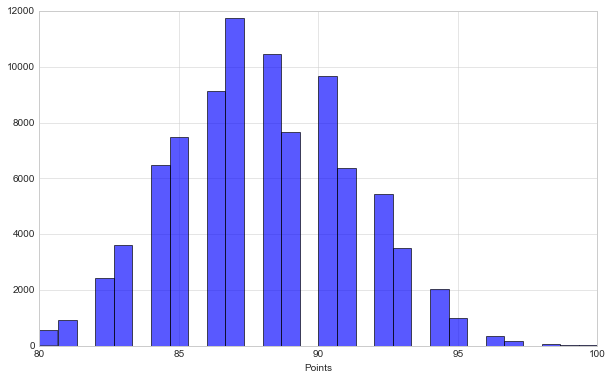

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
data['points'].hist(bins=30, alpha=.65)
plt.xlabel('Points')

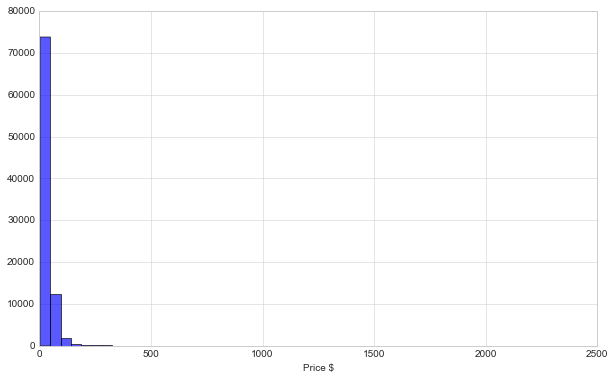

In [13]:
plt.figure(figsize=(10,6))
data['price'].hist(bins=50, alpha=.65)
plt.xlabel('Price $')

**Round wine prices to nearest tens**

The histogram (above) for wine prices seemed vague (range $0-100), so prices have been rounded to the nearest tens & re-plotted.

The bar graph below shows that most wine prices range between $20-30.

In [14]:
import math
data['rounded_price']= data['price'].apply(lambda x: math.ceil(x/10.0)*10)

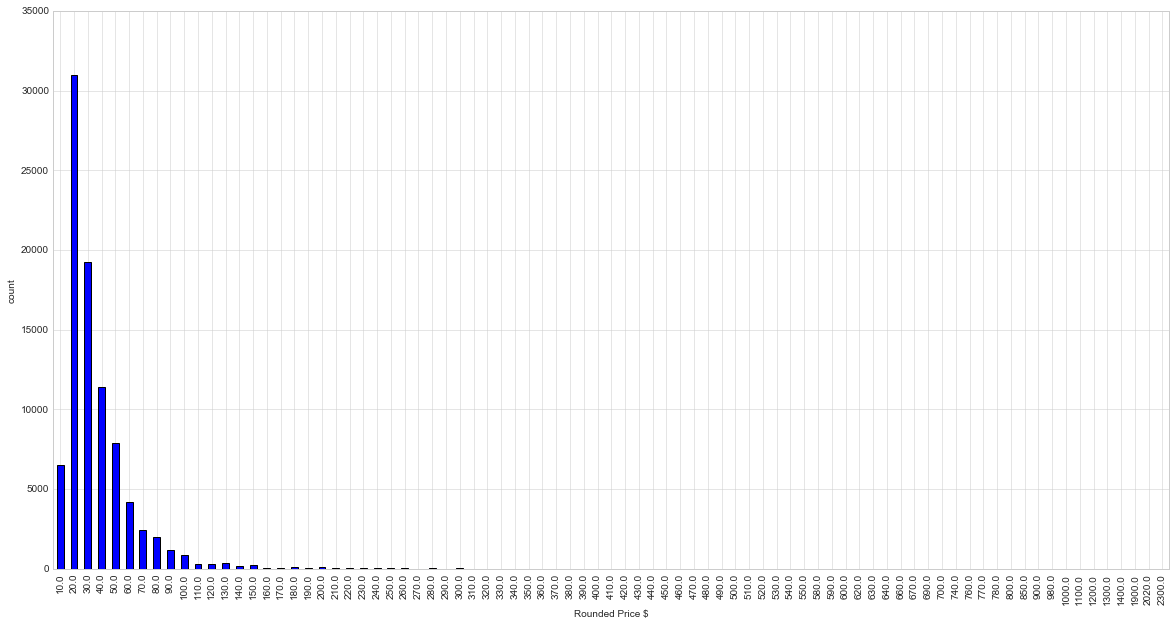

In [15]:
plt.figure(figsize=(20,10))
data['rounded_price'].value_counts().sort_index().plot.bar()
plt.xlabel('Rounded Price $')
plt.ylabel('count')

**Analyze wine from countries**

In [16]:
print('Countries in dataset: ' + '\n' + str(sorted(list(data['country'].unique()))))
print('\n')
print('Number of unique Countries in dataset: ' + str(data['country'].nunique()))

Countries in dataset: 
['Albania', 'Argentina', 'Australia', 'Austria', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Croatia', 'Cyprus', 'Czech Republic', 'England', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Luxembourg', 'Macedonia', 'Mexico', 'Moldova', 'Montenegro', 'Morocco', 'New Zealand', 'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Switzerland', 'Turkey', 'US', 'US-France', 'Ukraine', 'Uruguay']


Number of unique Countries in dataset: 46


In [17]:
df = pd.DataFrame(data.groupby('country')['points','price'].mean())
df1 = pd.DataFrame(data.groupby('country')['description'].count())
country= df.join(df1)

In [18]:
country.columns= ['Avg. Points', 'Avg. Price', 'Count of Wine']

In [19]:
country

,Avg. Points,Avg. Price,Count of Wine
country,,,
Albania,88.000000,20.000000,1
Argentina,86.082773,21.234572,3419
Australia,87.943835,31.630407,3098
Austria,89.337093,31.091479,1596
Bosnia and Herzegovina,85.333333,12.666667,3
Brazil,83.428571,20.928571,14
Bulgaria,85.767857,11.678571,56
Canada,88.716216,36.040541,148
Chile,86.281892,19.777027,3700


**Drop countries with count of <30 wines options**

In [20]:
country= country[country['Count of Wine']>=30]

In [21]:
country.shape

(25, 3)

In [22]:
country.sort_values(by=['Avg. Points'],inplace=True)

/Users/esther/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



**Plot Points/Price per Country**

Bar graph is sorted by country points: low to high

Wine from New Zealand or South Africa is the best bang for your buck!

In [23]:
import plotly.offline as py
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

trace1 = go.Bar(
    x= country.index,
    y= country['Avg. Points'],
    name='Avg. Points'
)

trace2= go.Bar(
    x= country.index,
    y= country['Avg. Price'],
    name='Avg. Price'
)

data=[trace1, trace2]
layout=go.Layout(
    barmode='stack')

fig=go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')